# 1. Introduction
***Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

A borough is just a fancy word for district. Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

# 2. Sourcing and Loading 

## 2a. Importing Libraries

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

## 2b.  Loading the data
The data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [4]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

# 3. Data Wrangling

## 3a. Preliminary data analysis

In [5]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


In [6]:
properties.columns

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [7]:
properties.index

RangeIndex(start=0, stop=304, step=1)

## 3b. Data cleaning

In [8]:
properties = properties.T
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679


In [9]:
properties.columns

RangeIndex(start=0, stop=304, step=1)

In [10]:
properties.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [11]:
properties = properties.reset_index()
properties.index

RangeIndex(start=0, stop=49, step=1)

In [12]:
properties.columns = properties.iloc[0]
properties = properties.drop(0)
properties.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,474821,473849,488784,501533,494770,432188,427126,424663,471574,446966


In [13]:
properties.columns

Index([       'Unnamed: 0',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2019-06-01 00:00:00, 2019-07-01 00:00:00, 2019-08-01 00:00:00,
       2019-09-01 00:00:00, 2019-10-01 00:00:00, 2019-11-01 00:00:00,
       2019-12-01 00:00:00, 2020-01-01 00:00:00, 2020-02-01 00:00:00,
       2020-03-01 00:00:00],
      dtype='object', name=0, length=305)

In [14]:
properties = properties.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})
properties.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,474821,473849,488784,501533,494770,432188,427126,424663,471574,446966


## 3c. Data transformation

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [15]:
properties = pd.melt(properties, id_vars = ['London_Borough', 'ID'])
properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [16]:
properties = properties.rename(columns = {0:'Month', 'value':'Average_Price'})
properties.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [17]:
properties['Average_Price'] = pd.to_numeric(properties['Average_Price'])
properties.head()

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [18]:
properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_Price            float64
dtype: object

## 3d. Additional data cleaning

In [19]:
properties.count()

London_Borough    14544
ID                13635
Month             14544
Average_Price     13635
dtype: int64

In [20]:
properties = properties.dropna()
properties.count()

London_Borough    13635
ID                13635
Month             13635
Average_Price     13635
dtype: int64

In [21]:
properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Inner London',
       'Outer London', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'England'], dtype=object)

In [22]:
properties[properties['London_Borough'] == 'City of London']

,London_Borough,ID,Month,Average_Price
0,City of London,E09000001,1995-01-01,91448.98487
48,City of London,E09000001,1995-02-01,82202.77314
96,City of London,E09000001,1995-03-01,79120.70256
144,City of London,E09000001,1995-04-01,77101.20804
192,City of London,E09000001,1995-05-01,84409.14932
...,...,...,...,...
14304,City of London,E09000001,2019-11-01,776894.39780
14352,City of London,E09000001,2019-12-01,737275.02650
14400,City of London,E09000001,2020-01-01,757376.69400
14448,City of London,E09000001,2020-02-01,765416.37670


In [23]:
properties['ID'].unique()

array(['E09000001', 'E09000002', 'E09000003', 'E09000004', 'E09000005',
       'E09000006', 'E09000007', 'E09000008', 'E09000009', 'E09000010',
       'E09000011', 'E09000012', 'E09000013', 'E09000014', 'E09000015',
       'E09000016', 'E09000017', 'E09000018', 'E09000019', 'E09000020',
       'E09000021', 'E09000022', 'E09000023', 'E09000024', 'E09000025',
       'E09000026', 'E09000027', 'E09000028', 'E09000029', 'E09000030',
       'E09000031', 'E09000032', 'E09000033', 'E13000001', 'E13000002',
       'E12000001', 'E12000002', 'E12000003', 'E12000004', 'E12000005',
       'E12000006', 'E12000007', 'E12000008', 'E12000009', 'E92000001'],
      dtype=object)

In [24]:
boroughs_only = properties[(properties.ID >= 'E09000002') & (properties.ID <= 'E09000033')]
boroughs_only['ID'].unique()

array(['E09000002', 'E09000003', 'E09000004', 'E09000005', 'E09000006',
       'E09000007', 'E09000008', 'E09000009', 'E09000010', 'E09000011',
       'E09000012', 'E09000013', 'E09000014', 'E09000015', 'E09000016',
       'E09000017', 'E09000018', 'E09000019', 'E09000020', 'E09000021',
       'E09000022', 'E09000023', 'E09000024', 'E09000025', 'E09000026',
       'E09000027', 'E09000028', 'E09000029', 'E09000030', 'E09000031',
       'E09000032', 'E09000033'], dtype=object)

# 4. Exploratory Data Analysis

In [25]:
boroughs_only.head()

,London_Borough,ID,Month,Average_Price
1,Barking & Dagenham,E09000002,1995-01-01,50460.22660
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698
5,Bromley,E09000006,1995-01-01,81671.47692


Text(0, 0.5, 'Price')

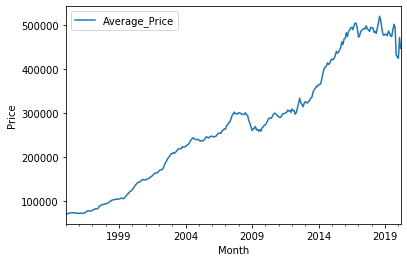

In [26]:
Brentplot = boroughs_only[boroughs_only.London_Borough == 'Brent'].plot(x='Month', y='Average_Price')
Brentplot.set_ylabel('Price')

In [27]:
boroughs_only['Year'] = pd.DatetimeIndex(boroughs_only['Month']).year
boroughs_only['Year'].unique()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020], dtype=int64)

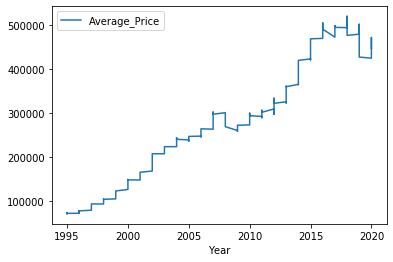

In [28]:
Brentplot_annual = boroughs_only[boroughs_only.London_Borough == 'Brent'].plot(x='Year', y='Average_Price')

# 5. Modeling

I will create a function: create_price_ratio.

This function will:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

I will then iterate this function through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

In [29]:
def create_price_ratio(column, year1, year2):
    ratios = []
    for borough in column.unique():
        firstyear = boroughs_only[(boroughs_only.London_Borough == borough) & (boroughs_only.Year == year1)]
        secondyear = boroughs_only[(boroughs_only.London_Borough == borough) & (boroughs_only.Year == year2)]
        firstavg = firstyear['Average_Price'].mean()
        secondavg = secondyear['Average_Price'].mean()
        ratio = firstavg / secondavg
        ratios.append((ratio, borough))
        ratios = sorted(ratios, reverse=True)
    for ratio, borough in ratios:
        print(borough + ': ' + str(ratio))
    
create_price_ratio(boroughs_only['London_Borough'], 1998, 2018)

Hounslow: 0.25148317824115635
Richmond upon Thames: 0.24967779731157863
Harrow: 0.24635417785626296
Bromley: 0.24421308489837312
Sutton: 0.24280551426824518
Hammersmith & Fulham: 0.24167443054605853
Hillingdon: 0.23807975835429931
Croydon: 0.23803288028014047
Bexley: 0.2353507654063011
Enfield: 0.23455064269011863
Kingston upon Thames: 0.23416190234282552
Ealing: 0.23194048191708755
Havering: 0.23120155787014757
Barnet: 0.22945274120785797
Redbridge: 0.2236545053715767
Tower Hamlets: 0.2161367227623553
Merton: 0.21091380604361798
Wandsworth: 0.2101851809159322
Greenwich: 0.20995010893854218
Islington: 0.20643891170300285
Brent: 0.2043086864360114
Barking & Dagenham: 0.20422256235393685
Camden: 0.20261973503252542
Lambeth: 0.20170435486140822
Kensington & Chelsea: 0.19675491852791563
Haringey: 0.19475619095546956
Newham: 0.18848754146121072
Westminster: 0.18679140473024677
Lewisham: 0.1835124676472171
Southwark: 0.18127484171283462
Waltham Forest: 0.1713867782439487
Hackney: 0.161334935

In [30]:
create_price_ratio(boroughs_only['London_Borough'], 2000, 2020)

Richmond upon Thames: 0.34865492015640204
Bromley: 0.3406370620539832
Harrow: 0.33641769765620755
Sutton: 0.3363365395326251
Ealing: 0.3310402213789739
Hammersmith & Fulham: 0.33061192018787716
Hounslow: 0.33007202063990904
Kingston upon Thames: 0.32929551566053106
Croydon: 0.3233620825969402
Hillingdon: 0.3204726100767273
Barnet: 0.3201841998604677
Brent: 0.314835215170372
Enfield: 0.31303018901632756
Bexley: 0.3092646318710082
Havering: 0.3046789819681369
Wandsworth: 0.30104425249995176
Tower Hamlets: 0.30044001325145087
Merton: 0.30008614949949847
Redbridge: 0.29471197360638285
Camden: 0.2945862104150054
Islington: 0.2920042946542126
Kensington & Chelsea: 0.2865088236918333
Southwark: 0.28585791935996874
Lambeth: 0.2805684256150486
Greenwich: 0.27263006367444614
Haringey: 0.26097988298398966
Lewisham: 0.25770613339415616
Westminster: 0.2497384411888793
Barking & Dagenham: 0.2485448635652366
Newham: 0.24596455274176382
Waltham Forest: 0.2339864899809323
Hackney: 0.22429863249233295


### 4. Conclusion

Out of all the boroughs of London, Richmond upon the Thames has seen the greatest increase in housing price, on average, over 
the last two decades, with an approximate increase of ~0.35 from the year 2000 to 2020. It is followed closely by Bromley, which saw an increase of ~0.34 in the same time span.